In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from PFNExperiments.LinearRegression.GenerativeModels.GenerateDataLM_Examples import make_lm_program_gamma_gamma, make_lm_program_gamma_gamma_batched
from PFNExperiments.LinearRegression.GenerativeModels.GenerateX import simulate_X_uniform

c:\Users\arik_\Documents\Dokumente\Job_Clausthal\PFNs\Repository\PFNExperiments\.conda\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:

def simluate_once_large(n = 100, p = 50):
    X = simulate_X_uniform(n, p)
    pprogram = make_lm_program_gamma_gamma()
    res = pprogram(X)
    return res

def simulate_several_times(n = 100, p = 50, times = 10000):
    for _ in range(times):
        simluate_once_large(n, p)

def simulate_batched(n = 100, p = 50, times = 32):
    X = simulate_X_uniform(n, p, batch_size = times)
    pprogram = make_lm_program_gamma_gamma_batched()
    
    r = pprogram(X)

    

In [6]:
import time 

start = time.time()
simluate_once_large()
end = time.time()
print(f"Time: {end - start}")

Time: 0.06338953971862793


In [7]:
#start = time.time()
#simulate_several_times()
#end = time.time()
#print(f"Time: {end - start}")

In [8]:
start = time.time()
simulate_batched()
end = time.time()

In [9]:
X = simulate_X_uniform(10, 100, batch_size = 128)

In [10]:
pprogram = make_lm_program_gamma_gamma_batched()

In [11]:
X_flat = X.reshape(-1, 100)

In [12]:
X_flat.shape

torch.Size([1280, 100])

In [13]:
r = pprogram(X)

In [14]:
r.keys()

dict_keys(['x', 'y', 'sigma_squared', 'beta_var', 'beta'])

In [15]:
r["x"].shape

torch.Size([128, 10, 100])

In [16]:
r["y"].shape

torch.Size([128, 10])

In [17]:
r["beta"].shape

torch.Size([128, 100])

In [18]:
from PFNExperiments.LinearRegression.GenerativeModels.GenerateDataCurriculum import SyntheticDataCurriculumBatched, GenerateDataCurriculum
from PFNExperiments.LinearRegression.GenerativeModels.Curriculum import Curriculum

In [19]:
N = 100
N_EPOCHS = 100
N_SAMPLES_PER_EPOCH = 1000
BATCH_SIZE = 1_000
N_BATCHES_PER_EPOCH = N_SAMPLES_PER_EPOCH // BATCH_SIZE

In [21]:
X = simulate_X_uniform(N, 50, batch_size = BATCH_SIZE)
res = pprogram(X)

(array([524., 491., 491., ..., 483., 489., 472.]),
 array([2.38418579e-07, 1.00238343e-04, 2.00238268e-04, ...,
        9.99799490e-01, 9.99899447e-01, 9.99999464e-01]),
 <BarContainer object of 10000 artists>)

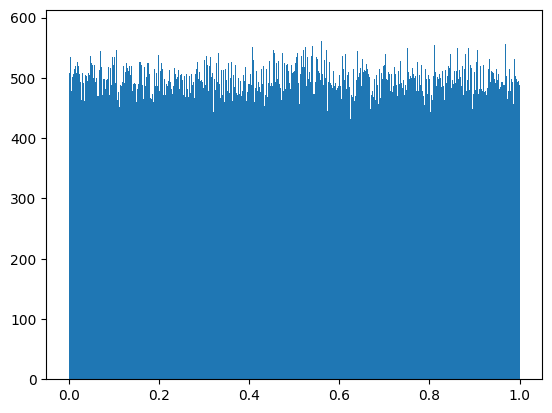

In [22]:
import matplotlib.pyplot as plt

X_flat = X.flatten()

plt.hist(X_flat, bins = 10_000)

In [26]:
import torch

1000


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  2.,  1.,  1.,  0.,  0.,  0.,
         2.,  0.,  0.,  1.,  0.,  2.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         3.,  4.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,
         1.,  3.,  0.,  2.,  1.,  3.,  0.,  1.,  1.,  0.,  2.,  2.,  4.,
         4.,  2.,  3.,  1.,  2.,  3.,  2.,  1.,  0.,  3.,  1.,  4.,  3.,
         2.,  1.,  3.,  2.,  4.,  2.,  2.,  2.,  2.,  4.,  0.,  5.,  1.,
         3.,  5.,  1.,  3.,  2.,  5.,  4.,  3.,  5.,  3.,  4.,  2.,  2.,
         4.,  7.,  1.,  3.,  3.,  3.,  1.,  1.,  8.,  8.,  5.,  5.,  7.,
         6.,  4.,  6.,  3.,  2.,  1.,  8.,  4.,  6.

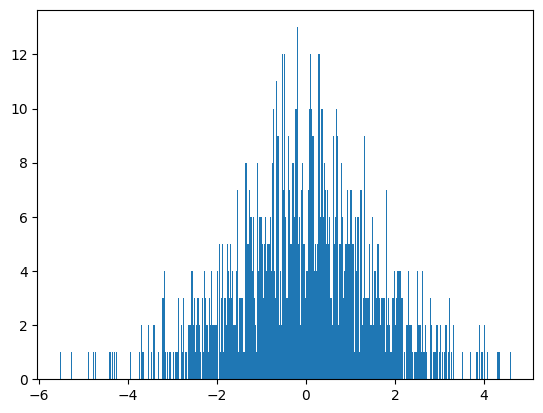

In [29]:
beta_0_flat = res["beta"][:, 0].flatten()
print(len(beta_0_flat))

plt.hist(beta_0_flat, bins = 400)

In [30]:
curriculum = Curriculum(max_iter=N_EPOCHS*N_SAMPLES_PER_EPOCH)
curriculum.add_param_list(
    [
    ("a0", curriculum.constant_scheduler(5.0)),
    ("b0", curriculum.constant_scheduler(2.0)),
    ("a1", curriculum.exponential_scheduler(1, 1)),
    ("b1", curriculum.constant_than_linear_than_constant_scheduler(160, 1, fraction_constant_beginning=0.2, fraction_constant_end=0.3))
    #("b1", curriculum.linear_scheduler(160, 1))
    ]
)
#curriculum.plot_all_schedules_epochs(n_epochs=10)
curriculum.get_params(0)
curriculum.get_params(N_SAMPLES_PER_EPOCH*N_EPOCHS-1)

data_generator = GenerateDataCurriculum(
    pprogram_maker=make_lm_program_gamma_gamma_batched,
    curriculum= curriculum
)

In [56]:
loader = data_generator.make_dataloaders_for_epoch_dynamic(
    epoch=0,
    n = 100,
    p = 20,
    n_samples_per_epoch= 10_000,
    batch_size=10_000,
    use_seed=False,
    n_samples_to_generate_at_once= 1
    
)

In [57]:
t1 = loader[0]

In [58]:
import torch

In [34]:
a0 = next(iter(t1))
a1 = next(iter(t1))

In [194]:
for key in a0.keys():
    print(f"Key: {key}, shape: {a0[key].shape}")

Key: x, shape: torch.Size([7000, 100, 20])
Key: y, shape: torch.Size([7000, 100])
Key: sigma_squared, shape: torch.Size([7000])
Key: beta_var, shape: torch.Size([7000])
Key: beta, shape: torch.Size([7000, 20])


In [195]:
a1

{'x': tensor([[[0.4764, 0.1543, 0.5028,  ..., 0.7248, 0.9555, 0.9367],
          [0.2519, 0.4075, 0.1152,  ..., 0.5785, 0.5808, 0.4425],
          [0.5947, 0.3271, 0.2843,  ..., 0.4284, 0.0591, 0.8148],
          ...,
          [0.7890, 0.9206, 0.4784,  ..., 0.5306, 0.0891, 0.1540],
          [0.6199, 0.6863, 0.2514,  ..., 0.1348, 0.9546, 0.1376],
          [0.2829, 0.7586, 0.3671,  ..., 0.0354, 0.6208, 0.8041]],
 
         [[0.2884, 0.1530, 0.9127,  ..., 0.2072, 0.1111, 0.1901],
          [0.3165, 0.1380, 0.9207,  ..., 0.2999, 0.4664, 0.7116],
          [0.2382, 0.5530, 0.7195,  ..., 0.4176, 0.2541, 0.2628],
          ...,
          [0.9378, 0.5589, 0.4848,  ..., 0.5819, 0.3407, 0.3276],
          [0.4469, 0.7306, 0.6852,  ..., 0.7883, 0.1241, 0.6835],
          [0.4322, 0.6735, 0.2807,  ..., 0.8304, 0.0220, 0.2109]],
 
         [[0.0600, 0.1517, 0.3782,  ..., 0.2367, 0.3797, 0.0859],
          [0.7453, 0.5404, 0.9999,  ..., 0.0625, 0.3410, 0.3362],
          [0.6745, 0.5358, 0.6501, 

In [39]:
t1_samples = []
for i in range(1):
    t1_samples.append(next(iter(t1)))

In [40]:
t1_samples_y = [x["y"] for x in t1_samples]
t1_samples_x = [x["x"] for x in t1_samples]
t1_samples_beta0 = [x["beta"][:, 0] for x in t1_samples]

In [41]:
t1_samples_y = torch.cat(t1_samples_y, dim = 0)
t1_samples_x = torch.cat(t1_samples_x, dim = 0)
t1_samples_beta0 = torch.cat(t1_samples_beta0, dim = 0)

In [42]:
t1_samples_y = t1_samples_y.flatten()
t1_samples_x = t1_samples_x.flatten()
t1_samples_beta0 = t1_samples_beta0.flatten()

In [43]:
len(t1_samples_y)

vals, counts = torch.unique(t1_samples_y, return_counts = True)

In [44]:
max(counts)

tensor(3)

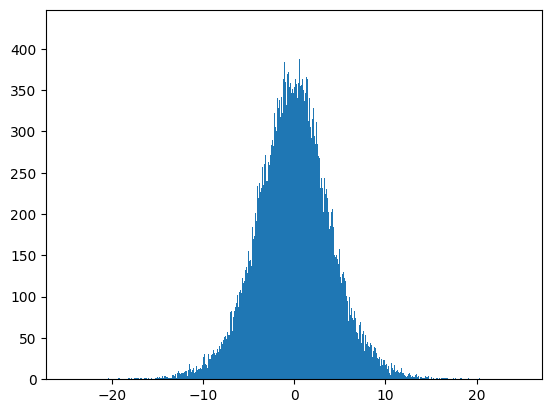

In [45]:
import matplotlib.pyplot as plt
plt.hist(t1_samples_y.numpy(), bins = 10_000)
plt.show()

(array([1454., 1397., 1441., ..., 1342., 1432., 1390.]),
 array([1.19209290e-07, 1.00119192e-04, 2.00119175e-04, ...,
        9.99799967e-01, 9.99899924e-01, 9.99999940e-01]),
 <BarContainer object of 10000 artists>)

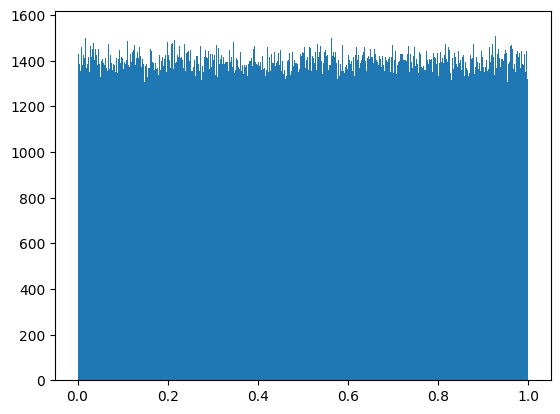

In [46]:
plt.hist(t1_samples_x.numpy(), bins = 10_000)

In [47]:
len(t1_samples_beta0)

7000

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
         1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,
         0.,  2.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,
         1.,  0.,  1.,  1.,  2.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,
         1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  2.

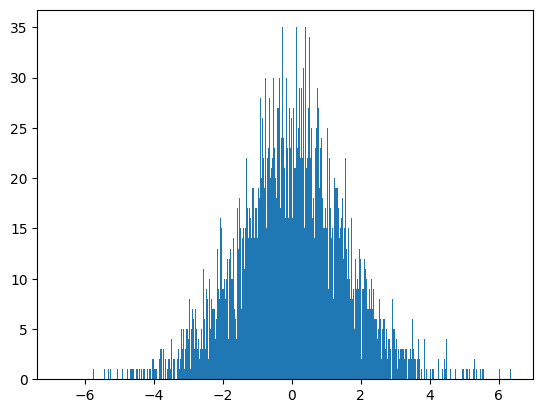

In [48]:
plt.hist(t1_samples_beta0.numpy(), bins = 1000)

In [49]:
vals, count = torch.unique(t1_samples_beta0, return_counts = True)

In [50]:
count.max()

tensor(2)

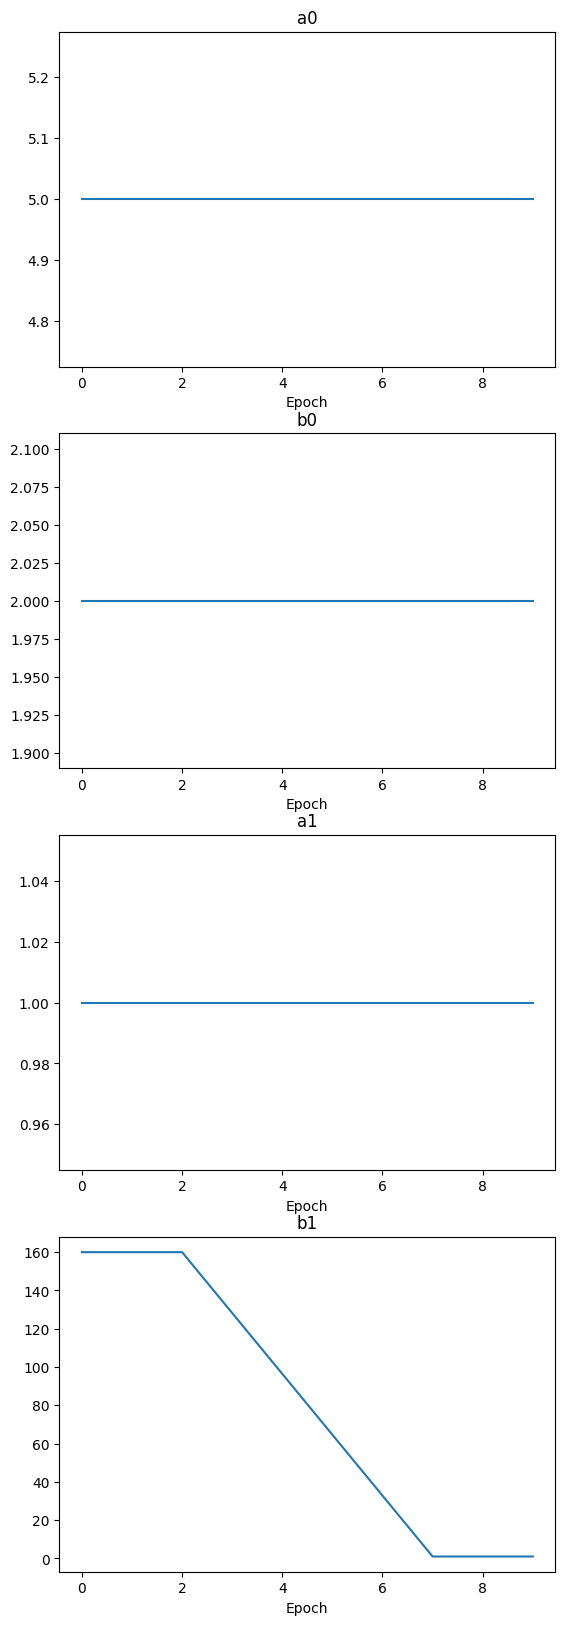

In [51]:
curriculum = Curriculum(max_iter=N_EPOCHS*N_SAMPLES_PER_EPOCH)
curriculum.add_param_list(
    [
    ("a0", curriculum.constant_scheduler(5.0)),
    ("b0", curriculum.constant_scheduler(2.0)),
    ("a1", curriculum.exponential_scheduler(1, 1)),
    ("b1", curriculum.constant_than_linear_than_constant_scheduler(160, 1, fraction_constant_beginning=0.2, fraction_constant_end=0.3))
    #("b1", curriculum.linear_scheduler(160, 1))
    ]
)
curriculum.plot_all_schedules_epochs(n_epochs=10)

In [52]:
curriculum.get_params(0)

{'a0': 5.0, 'b0': 2.0, 'a1': 1.0, 'b1': 160}

In [53]:
curriculum.get_params(N_SAMPLES_PER_EPOCH*N_EPOCHS-1)

{'a0': 5.0, 'b0': 2.0, 'a1': 1.0, 'b1': 1}

In [54]:
data_generator = GenerateDataCurriculum(
    pprogram_maker=make_lm_program_gamma_gamma_batched,
    curriculum= curriculum
)

(array([1., 0., 0., ..., 0., 0., 1.]),
 array([-24.72146797, -24.71652603, -24.711586  , ...,  24.68104172,
         24.68598175,  24.69092369]),
 <BarContainer object of 10000 artists>)

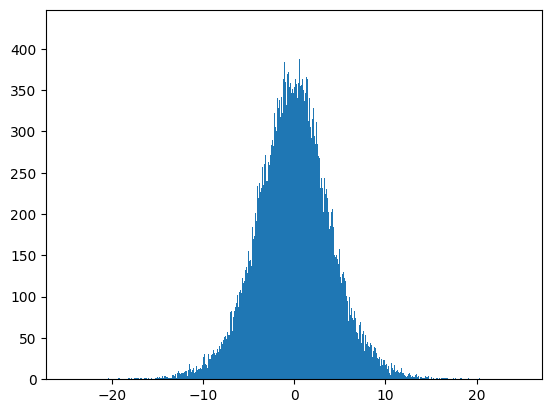

In [55]:
import matplotlib.pyplot as plt
plt.hist(t1_samples_y.numpy(), bins = 10_000)